# Import The Libaries

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

# Loading The Dataset

In [128]:
df = pd.read_csv('loan_prediction.csv')

In [129]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [130]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the data

In [132]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [133]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [134]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])



In [135]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Representation of total counts of categorical data

In [136]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

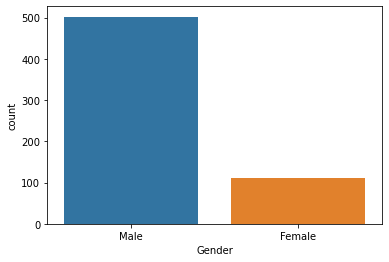

In [137]:
sns.countplot(df['Gender'])

In [138]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

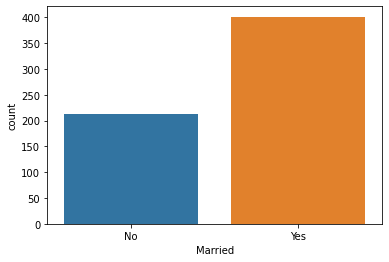

In [139]:
sns.countplot(df['Married'])

In [140]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

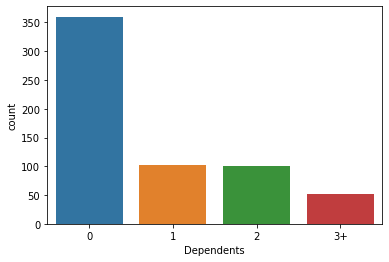

In [141]:
sns.countplot(df['Dependents'])

In [142]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

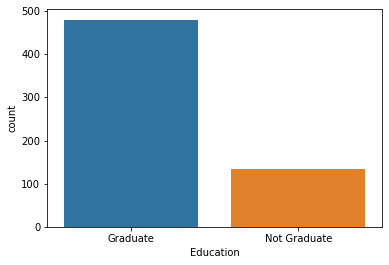

In [143]:
sns.countplot(df['Education'])

In [144]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

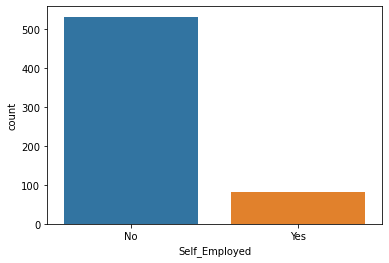

In [145]:
sns.countplot(df['Self_Employed'])

In [146]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

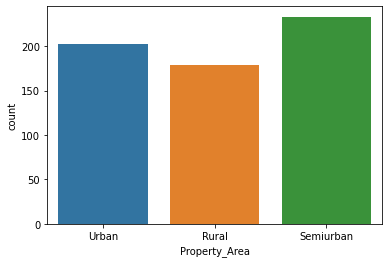

In [147]:
sns.countplot(df['Property_Area'])

In [148]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

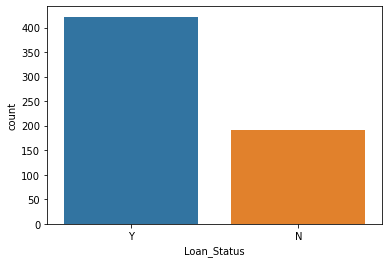

In [149]:
sns.countplot(df['Loan_Status'])

# Representation of Numeric data

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

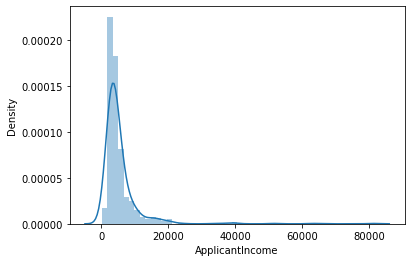

In [150]:
sns.distplot(df['ApplicantIncome'])

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

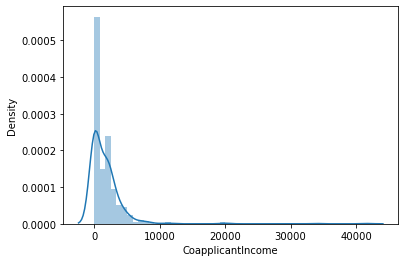

In [151]:
sns.distplot(df['CoapplicantIncome'])

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

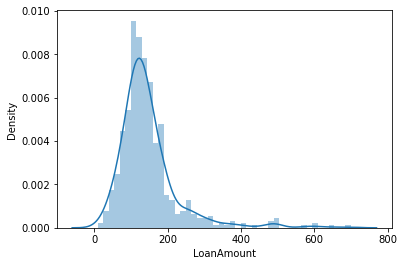

In [152]:
sns.distplot(df['LoanAmount'])

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

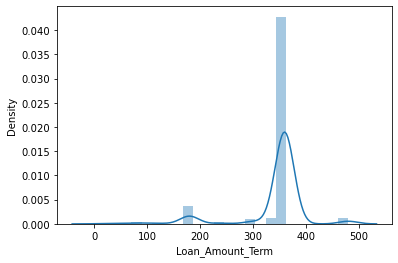

In [153]:
sns.distplot(df['Loan_Amount_Term'])

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

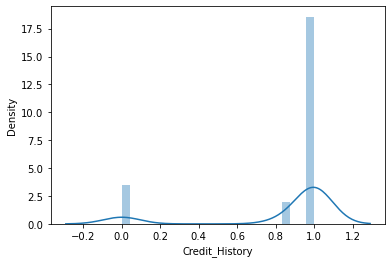

In [154]:
sns.distplot(df['Credit_History'])

In [155]:
df['Total_Income']=df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [156]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

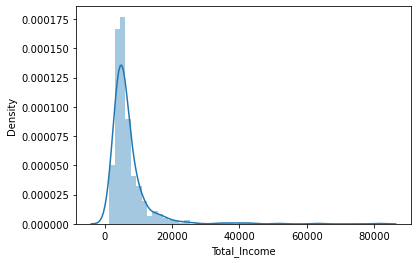

In [157]:
sns.distplot(df['Total_Income'])

# Coorelation Matrix

<AxesSubplot:>

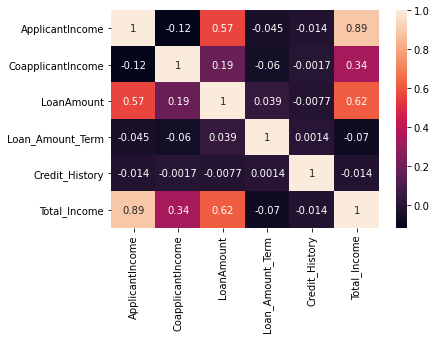

In [158]:
#corr=df.corr()
sns.heatmap(df.corr(), annot=True)

In [159]:
df.drop(columns='Loan_ID',axis=1,inplace=True)


# Label Encoding

In [160]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])


In [161]:
df.head(50)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.000000,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.000000,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.000000,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.000000,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.000000,2,1,6000.0
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.000000,2,1,9613.0
6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.000000,2,1,3849.0
7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.000000,1,0,5540.0
8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.000000,2,1,5532.0
9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.000000,1,0,23809.0


# Train And Test Split

In [162]:
X = df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.3, random_state=40)

In [164]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
predection = model.predict(X_test)

print("Acc. on Training data:{:,.3f}".format(lr.score(X_train,y_train)))
print("Acc. on Testing data:{:,.3f}".format(lr.score(X_test,y_test)))

Acc. on Training data:0.818
Acc. on Testing data:0.789


In [166]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predection))

[[ 18  36]
 [  3 128]]


In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predection))

              precision    recall  f1-score   support

           0       0.86      0.33      0.48        54
           1       0.78      0.98      0.87       131

    accuracy                           0.79       185
   macro avg       0.82      0.66      0.67       185
weighted avg       0.80      0.79      0.75       185



In [168]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier() 
modell = rfc.fit(X_train,y_train)
predection1 = modell.predict(X_test)

print("Acc. on Training data:{:,.3f}".format(rfc.score(X_train,y_train)))
print("Acc. on Testing data:{:,.3f}".format(rfc.score(X_test,y_test)))

Acc. on Training data:1.000
Acc. on Testing data:0.789


In [169]:
print(confusion_matrix(y_test,predection1))

[[ 22  32]
 [  7 124]]


In [170]:
print(classification_report(y_test,predection))

              precision    recall  f1-score   support

           0       0.86      0.33      0.48        54
           1       0.78      0.98      0.87       131

    accuracy                           0.79       185
   macro avg       0.82      0.66      0.67       185
weighted avg       0.80      0.79      0.75       185



In [176]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model2 = dtc.fit(X_train,y_train)
predection1 = modell.predict(X_test)

print("Acc. on Training data:{:,.3f}".format(dtc.score(X_train,y_train)))
print("Acc. on Testing data:{:,.3f}".format(dtc.score(X_test,y_test)))

Acc. on Training data:1.000
Acc. on Testing data:0.778


In [177]:
from sklearn.model_selection import cross_val_score
print("Mean of Cross validation score for  LogisticRegression model","=>",cross_val_score(lr,X,y,cv=5).mean())
print("Cross validation score for  RandomForestClassifiermodel","=>",cross_val_score(rfc,X,y,cv=5).mean())
print("Cross validation score for  DecisionTreeClassifiermodel","=>",cross_val_score(dtc,X,y,cv=5).mean())



C:\Users\Kaushik\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kaushik\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

Mean of Cross validation score for  LogisticRegression model => 0.8045715047314408
Cross validation score for  RandomForestClassifiermodel => 0.7769425563108091
Cross validation score for  DecisionTreeClassifiermodel => 0.7312541650006664


In [178]:
 y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [179]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 0.18181818181818182
MAE for test set is 0.21081081081081082
----------------------------------------------------------------------------------------
MSE for training set is 0.18181818181818182
MSE for test set is 0.21081081081081082
----------------------------------------------------------------------------------------
RMSE for training set is 0.4264014327112209
RMSE for test set is 0.45914138433690643


In [175]:
import pickle
loan_model = 'loan_model.pickle'
pickle.dump(model,open(loan_model,'wb'))

# LogisticRegression Gives the better result in all the above model